In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('Student_Performance.csv')

In [11]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [13]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [14]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [24]:
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X.shape

(10000, 5)

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 5), (8000,), (2000, 5), (2000,))

In [29]:
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5


In [30]:
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [40]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_train["Extracurricular Activities"] = encoder.fit_transform(X_train["Extracurricular Activities"])
X_test["Extracurricular Activities"] = encoder.transform(X_test["Extracurricular Activities"])

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [42]:
model

LinearRegression()

In [43]:
model.fit(X_train, y_train)

LinearRegression()

In [47]:
model.score(X_train, y_train)

0.9886898790682355

In [51]:
y_pred = model.predict(X_test)
y_pred

array([54.71185392, 22.61551294, 47.90314471, ..., 16.79341955,
       63.34327368, 45.94262301])

In [54]:
y_test

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
6412    45.0
8285    66.0
7853    16.0
1095    65.0
6929    47.0
Name: Performance Index, Length: 2000, dtype: float64

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

4.08262839852186
1.6111213463123055
2.020551508505007


In [62]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.9889832909573145


In [63]:
adjusted = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adjusted)

0.9889556663107681


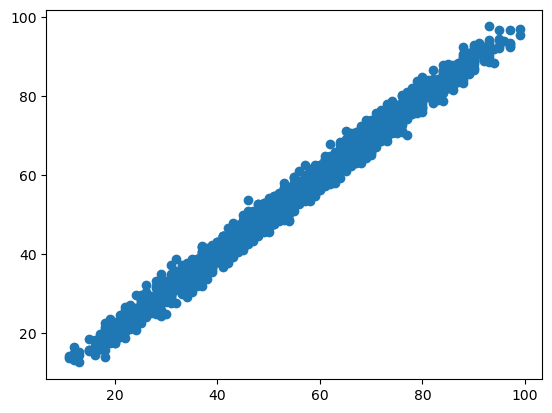

In [64]:
plt.scatter(y_test, y_pred)
plt.show()

In [65]:
residuals = y_test - y_pred
residuals

6252   -3.711854
4684   -2.615513
1731   -1.903145
4742   -3.289767
4521   -2.004570
          ...   
6412   -1.886280
8285    3.301975
7853   -0.793420
1095    1.656726
6929    1.057377
Name: Performance Index, Length: 2000, dtype: float64

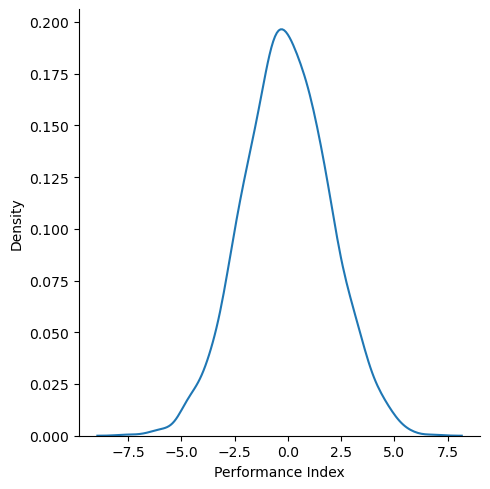

In [66]:
sns.displot(residuals, kind="kde")
plt.show()

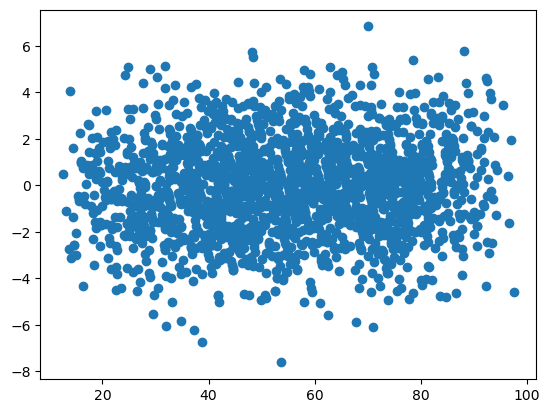

In [67]:
plt.scatter(y_pred, residuals)
plt.show()